In [ ]:
# Association Rules and Top 10 most Purchased Items
# APRIORI - the basic method to find which groups of items in dataset appear together
# Usage: product recommendation, market basket analytics, ...

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # mute deprecation warnings

In [ ]:
# load the data

In [2]:
from datetime import datetime, timezone
datetime.now(timezone.utc).replace(tzinfo=None)

datetime.datetime(2025, 11, 22, 17, 35, 46, 981400)

In [27]:
import pandas as pd
df = pd.read_csv("/content/apriori_data.csv")
print(df.head())

   Member_Name        Date   Item
0         2421  21/11/2015  lemon
1         1273  04/05/2015  lemon
2         2070  19/12/2015  lemon
3         1450  16/11/2015  lemon
4         2691  04/11/2015  lemon


In [ ]:
# group by member and date

In [21]:
basket = df.groupby(['Member_Name', 'Date'])['Item'].apply(list).reset_index()
transactions = basket['Item'].tolist()
print(transactions)

[['asparagus'], ['tea'], ['soda'], ['kale'], ['yoghurt'], ['skimmed milk'], ['other vegetables'], ['skimmed milk'], ['yoghurt'], ['quark'], ['konjak rice', 'konjak noodle'], ['cabbage'], ['skimmed milk'], ['kale'], ['yoghurt'], ['coconut'], ['reis'], ['konjak noodle'], ['skimmed milk'], ['UHT-milk', 'milk powder'], ['cocoa'], ['soda'], ['skimmed milk'], ['white cabbage'], ['socks'], ['vinegar'], ['konjak noodle'], ['salt'], ['tea'], ['fruit/vegetable juice'], ['root vegetables'], ['mango'], ['specialty chewing gum'], ['vitamins'], ['other vegetables'], ['beverages'], ['berries'], ['yoghurt'], ['yoghurt'], ['skimmed milk'], ['skimmed milk'], ['skimmed milk'], ['other vegetables'], ['cabbage'], ['salt'], ['yoghurt'], ['lemon'], ['yoghurt'], ['quark', 'herb quark'], ['skimmed milk'], ['quark'], ['syrup'], ['white cabbage'], ['white cabbage'], ['milk'], ['kale'], ['artificial sweetener', 'instant tea'], ['salt'], ['yoghurt'], ['skimmed milk'], ['kale'], ['photo/film'], ['tea'], ['vinegar']

In [ ]:
# convert to Convert to One-Hot ( True / False) Format

In [22]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [ ]:
# common combinations of items

In [23]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 27


In [24]:
print(frequent_itemsets)

     support                             itemsets
0   0.018136               (artificial sweetener)
1   0.083802                          (asparagus)
2   0.011674                            (berries)
3   0.034813                            (cabbage)
4   0.030019                       (citrus fruit)
5   0.011882                                (gel)
6   0.030436                         (herb quark)
7   0.018136                        (instant tea)
8   0.064207                               (kale)
9   0.016052                      (konjak noodle)
10  0.012716                        (konjak rice)
11  0.032103                              (lemon)
12  0.015843                               (lime)
13  0.041067                              (mango)
14  0.047321                   (other vegetables)
15  0.052741                              (quark)
16  0.013759                               (reis)
17  0.033563                    (root vegetables)
18  0.080884                       (skimmed milk)


In [ ]:
# If milk and quark are bought, cabbage is also likely to be bought.

# Support: How often the rule appears in the dataset.
# Confidence: Probability of buying item B if item A is bought.
# Lift: Strength of the rule over random chance. (>1 means it's a good rule)

In [25]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

Association Rules: 6


,antecedents,consequents,support,confidence,lift
0,(instant tea),(artificial sweetener),0.018136,1.000000,55.137931
1,(artificial sweetener),(instant tea),0.018136,1.000000,55.137931
2,(quark),(herb quark),0.030436,0.577075,18.960474
3,(herb quark),(quark),0.030436,1.000000,18.960474
4,(konjak rice),(konjak noodle),0.012716,1.000000,62.298701
5,(konjak noodle),(konjak rice),0.012716,0.792208,62.298701


In [ ]:
# items most frequently bought

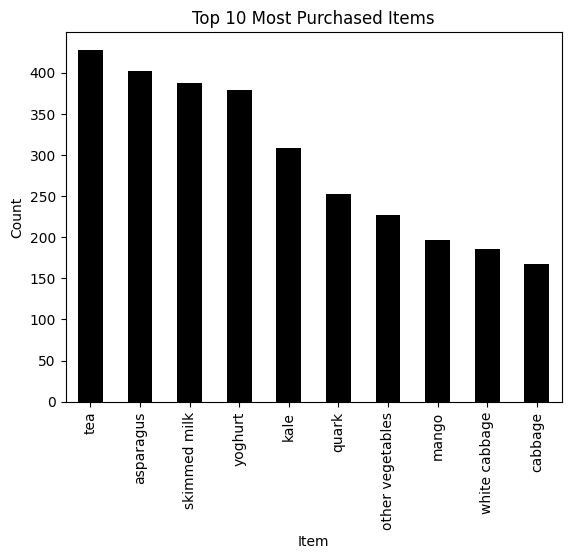

In [26]:
import matplotlib.pyplot as plt
top_items = df['Item'].value_counts().head(10)
top_items.plot(kind='bar', color='black', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()

In [ ]:
# https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/
# https://www.geeksforgeeks.org/machine-learning/apriori-algorithm/
# https://en.wikipedia.org/wiki/Apriori_algorithm